### Data Description

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day
  
Further info: https://archive.ics.uci.edu/dataset/603/in+vehicle+coupon+recommendation


### Import dataset and print labels

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv('data/coupons.csv')

In [5]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

In [8]:
# Unique values in each column
# Data description: https://archive.ics.uci.edu/dataset/603/in+vehicle+coupon+recommendation
print('destination:', data['destination'].unique(), '\n')
print('passanger:', data['passanger'].unique(), '\n')
print('weather:', data['weather'].unique(), '\n')
print('temperature:', data['temperature'].unique(), '\n')
print('time:', data['time'].unique(), '\n')
print('coupon:', data['coupon'].unique(), '\n')
print('expiration:', data['expiration'].unique(), '\n')
print('gender:', data['gender'].unique(), '\n')
print('age:', data['age'].unique(), '\n')
print('marital status:', data['maritalStatus'].unique(), '\n')
print('has children:', data['has_children'].unique(), '\n')
print('education:', data['education'].unique(), '\n')
print('occupation:', data['occupation'].unique(), '\n')
print('income:', data['income'].unique(), '\n')
print('car:', data['car'].unique(), '\n')
print('Bar:', data['Bar'].unique(), '\n')
print('Coffee House:', data['CoffeeHouse'].unique(), '\n')
print('Carry Away:', data['CarryAway'].unique(), '\n')
print('Rest less than 20:', data['RestaurantLessThan20'].unique(), '\n')
print('Rest 20 to 50:', data['Restaurant20To50'].unique(), '\n')
print('driving distance to restaurant/bar greater than 5 minutes:', data['toCoupon_GEQ5min'].unique(), '\n')
print('driving distance to restaurant/bar greater than 15 minutes:', data['toCoupon_GEQ15min'].unique(), '\n')
print('driving distance to restaurant/bar greater than 25 minutes:', data['toCoupon_GEQ25min'].unique(), '\n')
print('direction same:', data['direction_same'].unique(), '\n')
print('direction opp:', data['direction_opp'].unique(), '\n')
print('user will drive there vs not', data['Y'].unique(), '\n')

destination: ['No Urgent Place' 'Home' 'Work'] 

passanger: ['Alone' 'Friend(s)' 'Kid(s)' 'Partner'] 

weather: ['Sunny' 'Rainy' 'Snowy'] 

temperature: [55 80 30] 

time: ['2PM' '10AM' '6PM' '7AM' '10PM'] 

coupon: ['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)'] 

expiration: ['1d' '2h'] 

gender: ['Female' 'Male'] 

age: ['21' '46' '26' '31' '41' '50plus' '36' 'below21'] 

marital status: ['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed'] 

has children: [1 0] 

education: ['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School'] 

occupation: ['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Science' 'Personal Care & Se

### Remove missing values 
#### Naive Approach: remove all rows with non existent values

In [10]:
#The column 'toCoupon_GEQ5min' only has one value, we can safely remove this column as it gives us no information.

data = data.drop(columns='toCoupon_GEQ5min')

In [11]:
# Lets drop all NaN values and see how many rows are left.

data_clean1 = data.dropna()
print('Original dataset length:', len(data))
print('New dataset length:', len(data_clean1))

Original dataset length: 12684
New dataset length: 108


The dataset has too many rows with empty values. Let's see which columns have the most and see if we can omit those.
#### New approach: remove columns with most non existent values, then remove remaining non-existing values. 

In [13]:
# Find what columns have nans

data.isna().any()

destination             False
passanger               False
weather                 False
temperature             False
time                    False
coupon                  False
expiration              False
gender                  False
age                     False
maritalStatus           False
has_children            False
education               False
occupation              False
income                  False
car                      True
Bar                      True
CoffeeHouse              True
CarryAway                True
RestaurantLessThan20     True
Restaurant20To50         True
toCoupon_GEQ15min       False
toCoupon_GEQ25min       False
direction_same          False
direction_opp           False
Y                       False
dtype: bool

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'car'),
  Text(1, 0, 'Bar'),
  Text(2, 0, 'CoffeeHouse'),
  Text(3, 0, 'CarryAway'),
  Text(4, 0, 'RestaurantLessThan20'),
  Text(5, 0, 'Restaurant20To50')])

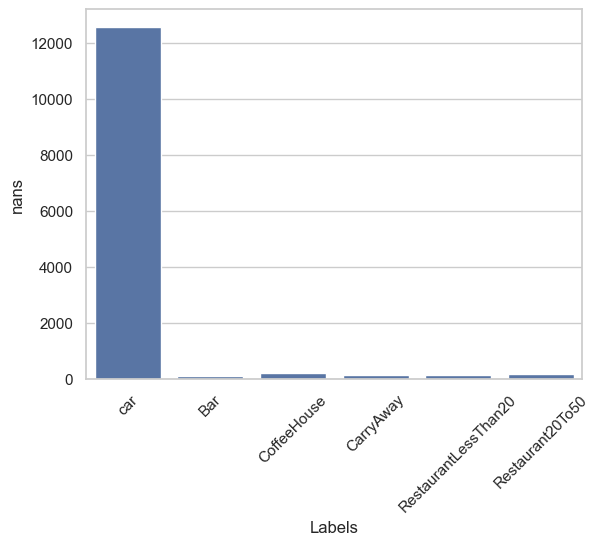

In [14]:
# Plot how many nans those columns have

nans = [data[col].isnull().sum() for col in data.columns]
nan_counts = pd.DataFrame({'Labels': data.columns, 'nans': nans})
nan_counts = nan_counts.query('nans != 0')
sns.set(style="whitegrid")
sns.barplot(x='Labels', y='nans', data=nan_counts)
plt.xticks(rotation=45)

In [15]:
# Because the car column has a lot more nan values than the other variables, we will drop that feature and then 
# remove the other rows with nan values

data_clean2 = data.drop(columns='car')
data_clean2 = data_clean2.dropna()
print('Original dataset length:', len(data))
print('New dataset length:', len(data_clean2))

Original dataset length: 12684
New dataset length: 12079


In [16]:
# This approach retains most of the original dataset, and we will move forward with this result

df = pd.DataFrame(data_clean2).reset_index(drop=True)
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,never,less1,4~8,4~8,less1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,never,less1,4~8,4~8,less1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,never,less1,4~8,4~8,less1,0,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,never,less1,4~8,4~8,less1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,never,less1,4~8,4~8,less1,0,0,0,1,0


### Proportion of the total observations that chose to accept the coupon

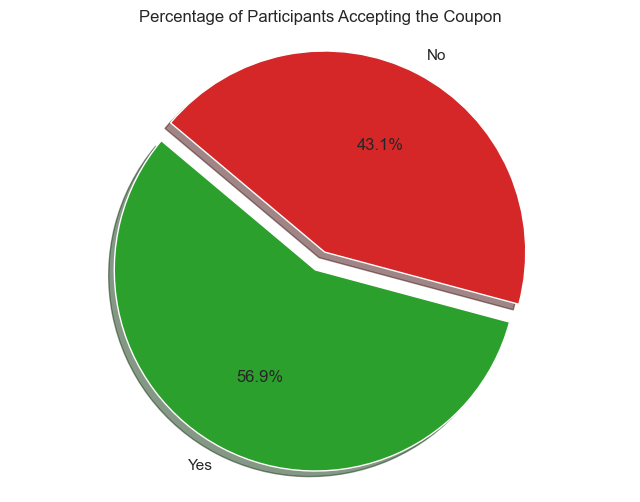

In [18]:
# Calculate counts
yes_count = len(df[df['Y'] == 1])
no_count = len(df[df['Y'] == 0])

# Prepare data for the pie chart
labels = ['Yes', 'No']
sizes = [yes_count, no_count]
colors = ['#2ca02c', '#d62728']  # You can choose other colors
explode = (0.1, 0)  # Explode the 'Yes' slice

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)

# Add title
plt.title('Percentage of Participants Accepting the Coupon')

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Show the plot
plt.show()

**Plot of coupon acceptance values across temperatures**

Text(0, 0.5, 'Frequency')

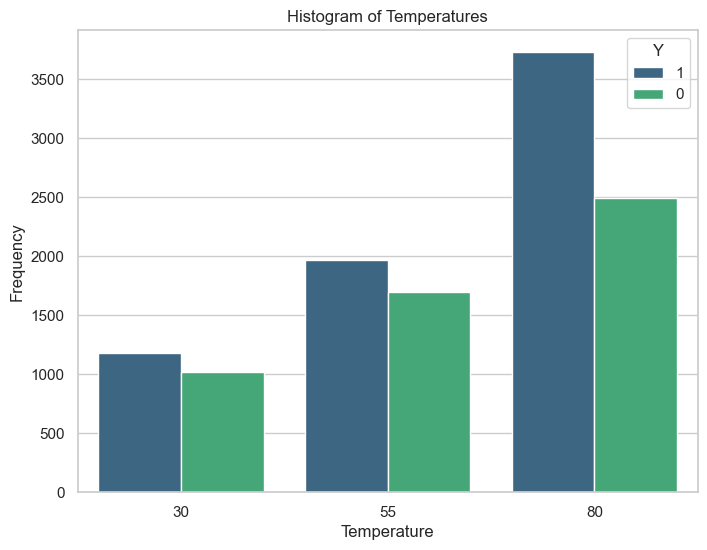

In [20]:
df_plot = df.copy()
df_plot['Y'] = df_plot['Y'].astype('str')
df_plot['temperature'] = df_plot['temperature'].astype('str')
order = list(df_plot['temperature'].unique())
order.sort()
# print(order)
# df_plot.dtypes
# print(df_plot['Y'].unique())
# print(df_plot['temperature'].unique())


plt.figure(figsize=(8, 6))
# sns.histplot(df, x='temperature', bins=3, kde=False, discrete=True, palette='viridis', hue='Y')
sns.countplot(data=df_plot, x='temperature', palette='viridis', hue='Y', order=order)

# Add title and labels
plt.title('Histogram of Temperatures')
plt.xlabel('Temperature')
plt.ylabel('Frequency')

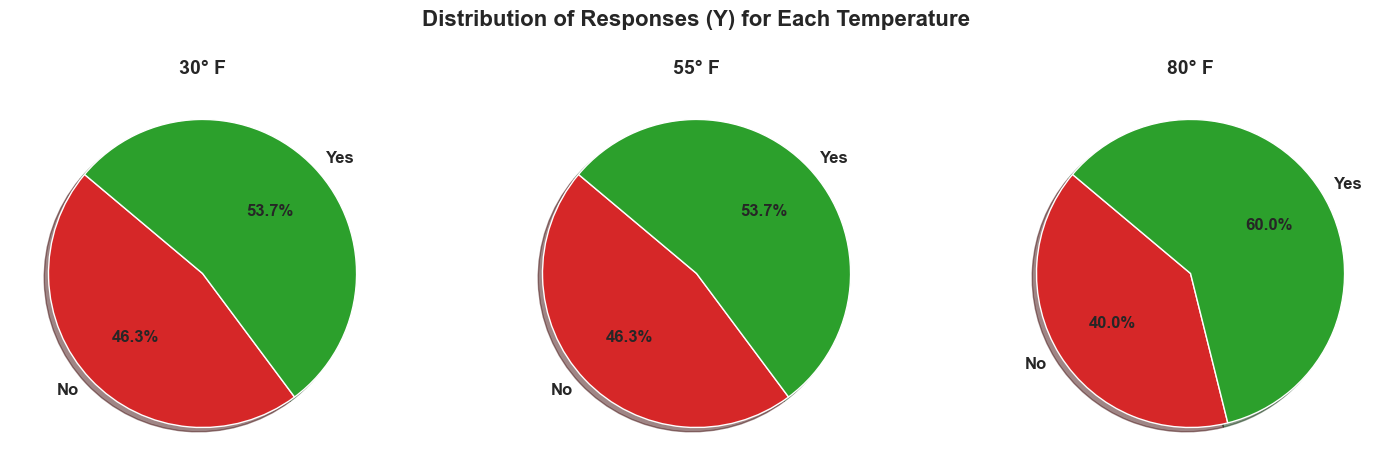

In [21]:
# Assuming df is already defined and includes the necessary columns

# Convert 'Y' and 'temperature' to string type for plotting
df_plot = df.copy()
df_plot['Y'] = df_plot['Y'].astype('str')
df_plot['temperature'] = df_plot['temperature'].astype('str')

# Sort the temperature order
order = list(df_plot['temperature'].unique())
order.sort()

# Calculate total counts and counts per Y value for each temperature
total_counts = df_plot.groupby('temperature').size()
y_counts = df_plot.groupby(['temperature', 'Y']).size().unstack(fill_value=0)

# Calculate percentages
y_counts['0%'] = (y_counts['0'] / (y_counts['0'] + y_counts['1']) * 100).round(1)
y_counts['1%'] = (y_counts['1'] / (y_counts['0'] + y_counts['1']) * 100).round(1)

# Define the seaborn style
sns.set(style="whitegrid")

# Create the figure and the axes for the pie charts
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Define a more vibrant color palette
colors = ['#d62728','#2ca02c']

# Plot the pie charts for each temperature
for ax, temp in zip(axes, order):
    sizes = [y_counts.loc[temp, '0%'], y_counts.loc[temp, '1%']]
    labels = ['No', 'Yes']
    
    wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140, shadow=True)
    
    # Enhance the text size and weight
    for text in texts + autotexts:
        text.set_fontsize(12)
        text.set_weight('bold')
    
    ax.set_title(f'{temp}° F', fontsize=14, weight='bold')

# Add a main title
plt.suptitle('Distribution of Responses (Y) for Each Temperature', fontsize=16, weight='bold')

# Show the plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


**Findings**

Overall, most participants in the survey accepted the coupon. We also found that participants were a bit more likely to accept the coupon if it was warmer outside.

### Investigating the Bar Coupons

**Exploration of the bar related coupons.**  

In [24]:
df_bar = df.query('coupon == "Bar"').reset_index(drop=True)
df_bar

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,never,less1,4~8,4~8,less1,0,0,0,1,1
1,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,never,less1,4~8,4~8,less1,0,0,1,0,1
2,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,never,less1,4~8,4~8,less1,1,1,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,never,4~8,1~3,1~3,never,0,0,0,1,0
4,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,never,4~8,1~3,1~3,never,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1908,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,never,1~3,4~8,1~3,1,0,0,1,0
1909,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,never,1~3,4~8,1~3,1,0,0,1,0
1910,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,never,1~3,4~8,1~3,1,0,0,1,0
1911,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,never,1~3,4~8,1~3,1,0,0,1,0


**Overall acceptance rate of bar coupons**

In [26]:
yes = len(df_bar.query('Y == 1'))
no = len(df_bar.query('Y == 0'))

print()
print(f'{round(yes/len(df_bar)*100)} % of drivers accepted the bar coupon')
print(f'{round(no/len(df_bar)*100)} % of drivers did not accept the bar coupon')
print('\n')


41 % of drivers accepted the bar coupon
59 % of drivers did not accept the bar coupon




**Are those who went to a bar 3 or fewer times a month more likely to accept the coupon than those who went more?**


In [28]:
less_vals = ['never', 'less1', '1~3']
more_vals = ['1~3', 'gt8','4~8']

total_less = len(df_bar.query('Bar in @less_vals'))
yes_less = len(df_bar.query('Y == 1 and Bar in @less_vals'))

total_more = len(df_bar.query('Bar in @more_vals'))
yes_more = len(df_bar.query('Y == 1 and Bar in @more_vals'))

print()
print(f'{round(yes_less/total_less*100)} % of drivers who went to the bar less than 3 times a month accepted the coupon')
print(f'{round(yes_more/total_more*100)} % of drivers who went to the bar more than 3 times a month accepted the coupon')
print('\n')


37 % of drivers who went to the bar less than 3 times a month accepted the coupon
69 % of drivers who went to the bar more than 3 times a month accepted the coupon




**Are drivers who:<br>
    - go to a bar more than once a month and<br>
    - are over the age of 25<br>
more likely to accept the coupon?**


In [30]:
more = ['1~3', 'gt8','4~8']
less_than25 = ['21','below21']

total_group = df_bar.query('Bar in @more and age not in @less_than25')
yes_1 = len(total_group.query('Y == 1'))

total_others = df_bar.query('Bar not in @more and age in @less_than25')
yes_2 = len(total_others.query('Y == 1'))
print()
print(f'{round(yes_1/len(total_group)*100)} % of drivers over the age of 25 who went to the bar more than 1 times a month accepted the coupon')
print(f'{round(yes_2/len(total_others)*100)} % of the other drivers accepted the coupon')
print('\n')


69 % of drivers over the age of 25 who went to the bar more than 1 times a month accepted the coupon
39 % of the other drivers accepted the coupon




**Are drivers who:<br>
    - go to bars more than once a month *AND*<br>
    - had passengers that were not a kid *AND*<br>
    - had occupations other than farming, fishing, or forestry<br>
more likely to accept the coupon?**

In [32]:
more = ['1~3', 'gt8','4~8']
passanger_kid = ['Kid(s)']
occup = ['Farming Fishing & Forestry']

total_group = df_bar.query('Bar in @more and passanger not in @passanger_kid and occupation not in @occup')
yes_1 = len(total_group.query('Y == 1'))

total_others = df_bar.query('Bar not in @more and passanger in @passanger_kid and occupation in @occup')
yes_2 = len(total_others.query('Y == 1'))

print()
print(f'{round(yes_1/len(total_group)*100)} % of drivers who went to the bar more than 1 times a month and don\'t have kids in the car and work in the field of farming, fishing and forestry accepted the coupon')
print(f'{round(yes_2/len(total_others)*100)} % of drivers who went to the bar less than 1 times a month and have kids in the car and don\'t work in the field of farming, fishing and forestry accepted the coupon')
print('\n')


71 % of drivers who went to the bar more than 1 times a month and don't have kids in the car and work in the field of farming, fishing and forestry accepted the coupon
33 % of drivers who went to the bar less than 1 times a month and have kids in the car and don't work in the field of farming, fishing and forestry accepted the coupon




**Are drivers who:<br>
    - go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*<br>
    - go to bars more than once a month and are under the age of 30 *OR*<br>
    - go to cheap restaurants more than 4 times a month and income is less than 50K<br>
more likely to accept the coupon?**

In [34]:
cond1_1 = ['1~3', 'gt8','4~8']
cond1_2 = ['Friend(s)', 'Alone', 'Partner']
cond1_3 = ['Single', 'Married partner', 'Unmarried partner', 'Divorced']
cond2_1 = ['1~3', 'gt8','4~8']
cond2_2 = ['below21', '21', '26']
cond3_1 = ['4~8','gt8']
cond3_2 = ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']

condition_query = '(Bar in @cond1_1 and passanger in @cond1_2 and maritalStatus in @cond1_3) or (Bar in @cond2_1 and age in @cond2_1) or (RestaurantLessThan20 in @cond3_1 and income in @cond3_2)'

total_group = df.query(condition_query)
yes_1 = len(total_group.query('Y == 1'))

total_other = df.query(f'not ({condition_query})')
yes_2 = len(total_other.query('Y == 1'))

print(f'''
The drivers who:
- go to bars more than once a month, had passengers that were not a kid, and were not widowed OR
- go to bars more than once a month and are under the age of 30 OR
- go to cheap restaurants more than 4 times a month and income is less than 50K

accepted the bar coupon {round(yes_1/len(total_group)*100)}% of the time.

The drivers who didn't, accepted the coupon {round(yes_2/len(total_other)*100)}% of the time.
''')



The drivers who:
- go to bars more than once a month, had passengers that were not a kid, and were not widowed OR
- go to bars more than once a month and are under the age of 30 OR
- go to cheap restaurants more than 4 times a month and income is less than 50K

accepted the bar coupon 61% of the time.

The drivers who didn't, accepted the coupon 54% of the time.



In [35]:
# Average age of bar-goers
# Define the categories to be mapped
age_mapping = {
    'below21': 20,
    '21': 21,
    '26': 26,
    '31': 31,
    '36': 36,
    '41': 41,
    '46': 46,
    '50plus': 50
}

# Map the age categories to numeric values
df['age_numeric'] = df['age'].map(age_mapping)

# Define the bar frequency values that are considered "more than once a month"
more = ['1~3', '4~8', 'gt8']

# Filter the DataFrame for people who go to the bar more than once a month
filtered_df = df.query('Bar in @more')

# Calculate the average age
average_age = filtered_df['age_numeric'].mean()

print(f'The estimated average age of people who go to the bar more than once a month is {average_age:.2f}')

The estimated average age of people who go to the bar more than once a month is 30.01


**Findings**

Overall, participants of this survey did not accept the bar coupon.But there are some demographics that are likely to accept the coupon overall.

Based on the above analysis:
1. Those who go to the bar more than 3 times a month are more likely to accept the coupon.<br>
2. Those who go to a bar more than once a month and are over the age of 25 are more likely to accept the coupon.<br>
3. Those who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry are more likely to accept the coupon.<br>
4. Those who:<br>
   - go to bars more than once a month, had passengers that were not a kid, and were not widowed OR<br>
   - go to bars more than once a month and are under the age of 30 OR<br>
   - dine at non-expensive restaurants more than 4 times a month and earn less than $50k a year<br>
    are more likely to accept the coupon.

From these results, we can hypothesize that there are four kinds of people who are more likely to accept coupons for bars. The first are those who are frequent bar-goers. The second are above college-aged and are bar-goers. The third are those who frequent bars, who are either alone or with drinking-age passangers, and have "white collar" jobs. The fourth are those who:<br>
* go to bars, are with people who are old enough to go to bars with them and are either in a current relationship (married or partnered) or has never been married, or is legally separated or divorced<br>
* those who go to bars and are younfer than the average bar-goer<br>
* those who eat out very often and are not in a high-income bracket.<br>

### Independent Investigation

**Exploring other coupon groups and determining the characteristics of passengers who accept the coupons** 

In [38]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,age_numeric
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,0,0,0,1,1,21
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,0,0,0,1,0,21
2,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,0,0,0,1,1,21
3,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,21
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,0,0,0,1,0,21


In [39]:
df['coupon'].unique()

array(['Restaurant(<20)', 'Coffee House', 'Bar', 'Carry out & Take away',
       'Restaurant(20-50)'], dtype=object)

In [40]:
# We will be investigating the relationship between frequency of visit, income bracket and coupon acceptance frequency 
# for each business
often = ['4~8', 'gt8']
not_often = ['1~3', 'less1', 'never']

low_income = ['Less than $12500', '$12500 - $24999', '$25000 - $37499']
med_income = ['$37500 - $49999', '$50000 - $62499', '$62500 - $74999']
high_income = ['$75000 - $87499', '$87500 - $99999', '$100000 or More']

In [41]:
df_less = df.query('coupon == "Restaurant(<20)"')
df_more = df.query('coupon == "Restaurant(20-50)"')
df_away = df.query('coupon == "Carry out & Take away"')

In [42]:
yes_less = len(df_less.query('Y == 1'))
yes_more = len(df_more.query('Y == 1'))
yes_away = len(df_away.query('Y == 1'))

print(f'{round(yes_less/len(df_less) *100)}% of cheap restaurant coupons were accepted')
print(f'{round(yes_more/len(df_more) *100)}% of expensive restaurant coupons were accepted')
print(f'{round(yes_away/len(df_away) *100)}% of take-away restaurant coupons were accepted')

71% of cheap restaurant coupons were accepted
45% of expensive restaurant coupons were accepted
74% of take-away restaurant coupons were accepted


In [43]:
# Income vs coupon acceptance rate for every business

inc = [low_income, med_income, high_income]
names = ['low income', 'medium income', 'high income']

yes_less = []
for i in inc:
    often_r = (len(df_less.query(f'Y == 1 and income in {i}')) / len(df_less.query(f'income in {i}')) * 100)
    yes_less.append(often_r)
    
yes_more = []
for i in inc:
    often_r = (len(df_more.query(f'Y == 1 and income in {i}')) / len(df_more.query(f'income in {i}')) * 100)
    yes_more.append(often_r)

yes_away = []
for i in inc:
    often_r = (len(df_away.query(f'Y == 1 and income in {i}')) / len(df_away.query(f'income in {i}')) * 100)
    yes_away.append(often_r)


# Print results
for i, percent in enumerate(yes_less):
    print(f'{percent}% of people who accept coupons from less expensive restaurants are {names[i]} earners')
print('\n')

for i, percent in enumerate(yes_away):
    print(f'{percent}% of people who accept coupons from take-out restaurants are {names[i]} earners')
print('\n')

for i, percent in enumerate(yes_more):
    print(f'{percent}% of people who accept coupons from more expensive restaurants are {names[i]} earners')

72.42718446601941% of people who accept coupons from less expensive restaurants are low income earners
71.92784667418263% of people who accept coupons from less expensive restaurants are medium income earners
67.52717391304348% of people who accept coupons from less expensive restaurants are high income earners


76.48376259798432% of people who accept coupons from take-out restaurants are low income earners
74.13793103448276% of people who accept coupons from take-out restaurants are medium income earners
69.51026856240127% of people who accept coupons from take-out restaurants are high income earners


43.18181818181818% of people who accept coupons from more expensive restaurants are low income earners
44.650205761316876% of people who accept coupons from more expensive restaurants are medium income earners
46.40198511166253% of people who accept coupons from more expensive restaurants are high income earners


In [44]:
# Business visity frequency vs coupon acceptance rate for every business

restaurants = ['RestaurantLessThan20', 'Restaurant20To50', 'CarryAway']
names = ['inexpensive', 'expensive', 'take-out']


yes_less = []
for r in restaurants:
    often_r = round(len(df_less.query(f'Y == 1 and {r} in @often')) / len(df_less.query(f'{r} in @often')) * 100)
    yes_less.append(often_r)
    
yes_more = []
for r in restaurants:
    often_r = round(len(df_more.query(f'Y == 1 and {r} in @often')) / len(df_more.query(f'{r} in @often')) * 100)
    yes_more.append(often_r)

yes_away = []
for r in restaurants:
    often_r = round(len(df_away.query(f'Y == 1 and {r} in @often')) / len(df_away.query(f'{r} in @often')) * 100)
    yes_away.append(often_r)


# Print results
for i, percent in enumerate(yes_less):
    print(f'{percent}% of people who accept coupons from less expensive restaurants also go to {names[i]} restaurants +4 times a month')
print('\n')

for i, percent in enumerate(yes_away):
    print(f'{percent}% of people who accept coupons from take-out restaurants also go to {names[i]} restaurants +4 times a month')
print('\n')

for i, percent in enumerate(yes_more):
    print(f'{percent}% of people who accept coupons from more expensive restaurants also go to {names[i]} restaurants +4 times a month')

73% of people who accept coupons from less expensive restaurants also go to inexpensive restaurants +4 times a month
70% of people who accept coupons from less expensive restaurants also go to expensive restaurants +4 times a month
71% of people who accept coupons from less expensive restaurants also go to take-out restaurants +4 times a month


75% of people who accept coupons from take-out restaurants also go to inexpensive restaurants +4 times a month
73% of people who accept coupons from take-out restaurants also go to expensive restaurants +4 times a month
75% of people who accept coupons from take-out restaurants also go to take-out restaurants +4 times a month


48% of people who accept coupons from more expensive restaurants also go to inexpensive restaurants +4 times a month
65% of people who accept coupons from more expensive restaurants also go to expensive restaurants +4 times a month
44% of people who accept coupons from more expensive restaurants also go to take-out resta

**How often did the participants visit the different businesses?**

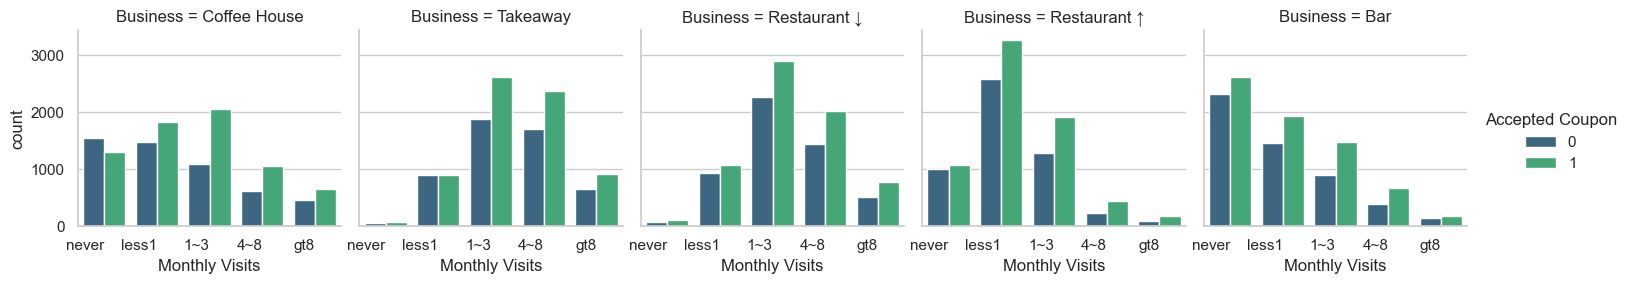

In [46]:
df_business = df[['Y', 'coupon', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50', 'Bar', 'CoffeeHouse']].copy()
variables = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
categories = ['never', 'less1', '1~3', '4~8', 'gt8']

for column in variables:
    df_business.loc[:, column] = pd.Categorical(df_business.loc[:, column], categories=categories, ordered=True)

label_mapping = {
    'Restaurant(<20)': 'Restaurant ↓',
    'Restaurant(20-50)': 'Restaurant ↑',
    'Bar': 'Bar',
    'Carry out & Take away': 'Takeaway',
    'Coffee House': 'Coffee House'
}

column_mapping = {
    'RestaurantLessThan20': 'Restaurant ↓',
    'Restaurant20To50': 'Restaurant ↑',
    'Bar': 'Bar',
    'CarryAway': 'Takeaway',
    'CoffeeHouse': 'Coffee House'
}

df_business.loc[:, 'coupon'] = df_business['coupon'].replace(label_mapping)

df_business.rename(columns=column_mapping, inplace=True)

updated_variables = ['Coffee House', 'Takeaway', 'Restaurant ↓', 'Restaurant ↑', 'Bar']

melted_df = pd.melt(df_business, id_vars=['coupon', 'Y'], value_vars=updated_variables)

g = sns.FacetGrid(melted_df, col="variable", col_order=updated_variables, sharex=False, sharey=True)
g.map_dataframe(sns.countplot, x="value", hue='Y', order=categories, palette='viridis')

for ax, label in zip(g.axes.flat, updated_variables):
    ax.set_xticks(range(len(categories)))
    ax.set_xticklabels(categories, ha='right')
    ax.set_xlabel('Monthly Visits')
    ax.set_title(f'Business = {label}')

# Add legend
g.add_legend(title="Accepted Coupon")

plt.show()

We can see that most drivers in this survey go to coffee houses less than three times a month, go to takeaway restaurants more than once a month, go to inexpensive restaurant more than once a month, and go to mars less than once a month. We see from this graph that most participants accept the coupon. Iterestingly, most people who never go to bars accepted the coupon.

**Out of those who accepted a certian type of coupon, how often would they visit each business?**

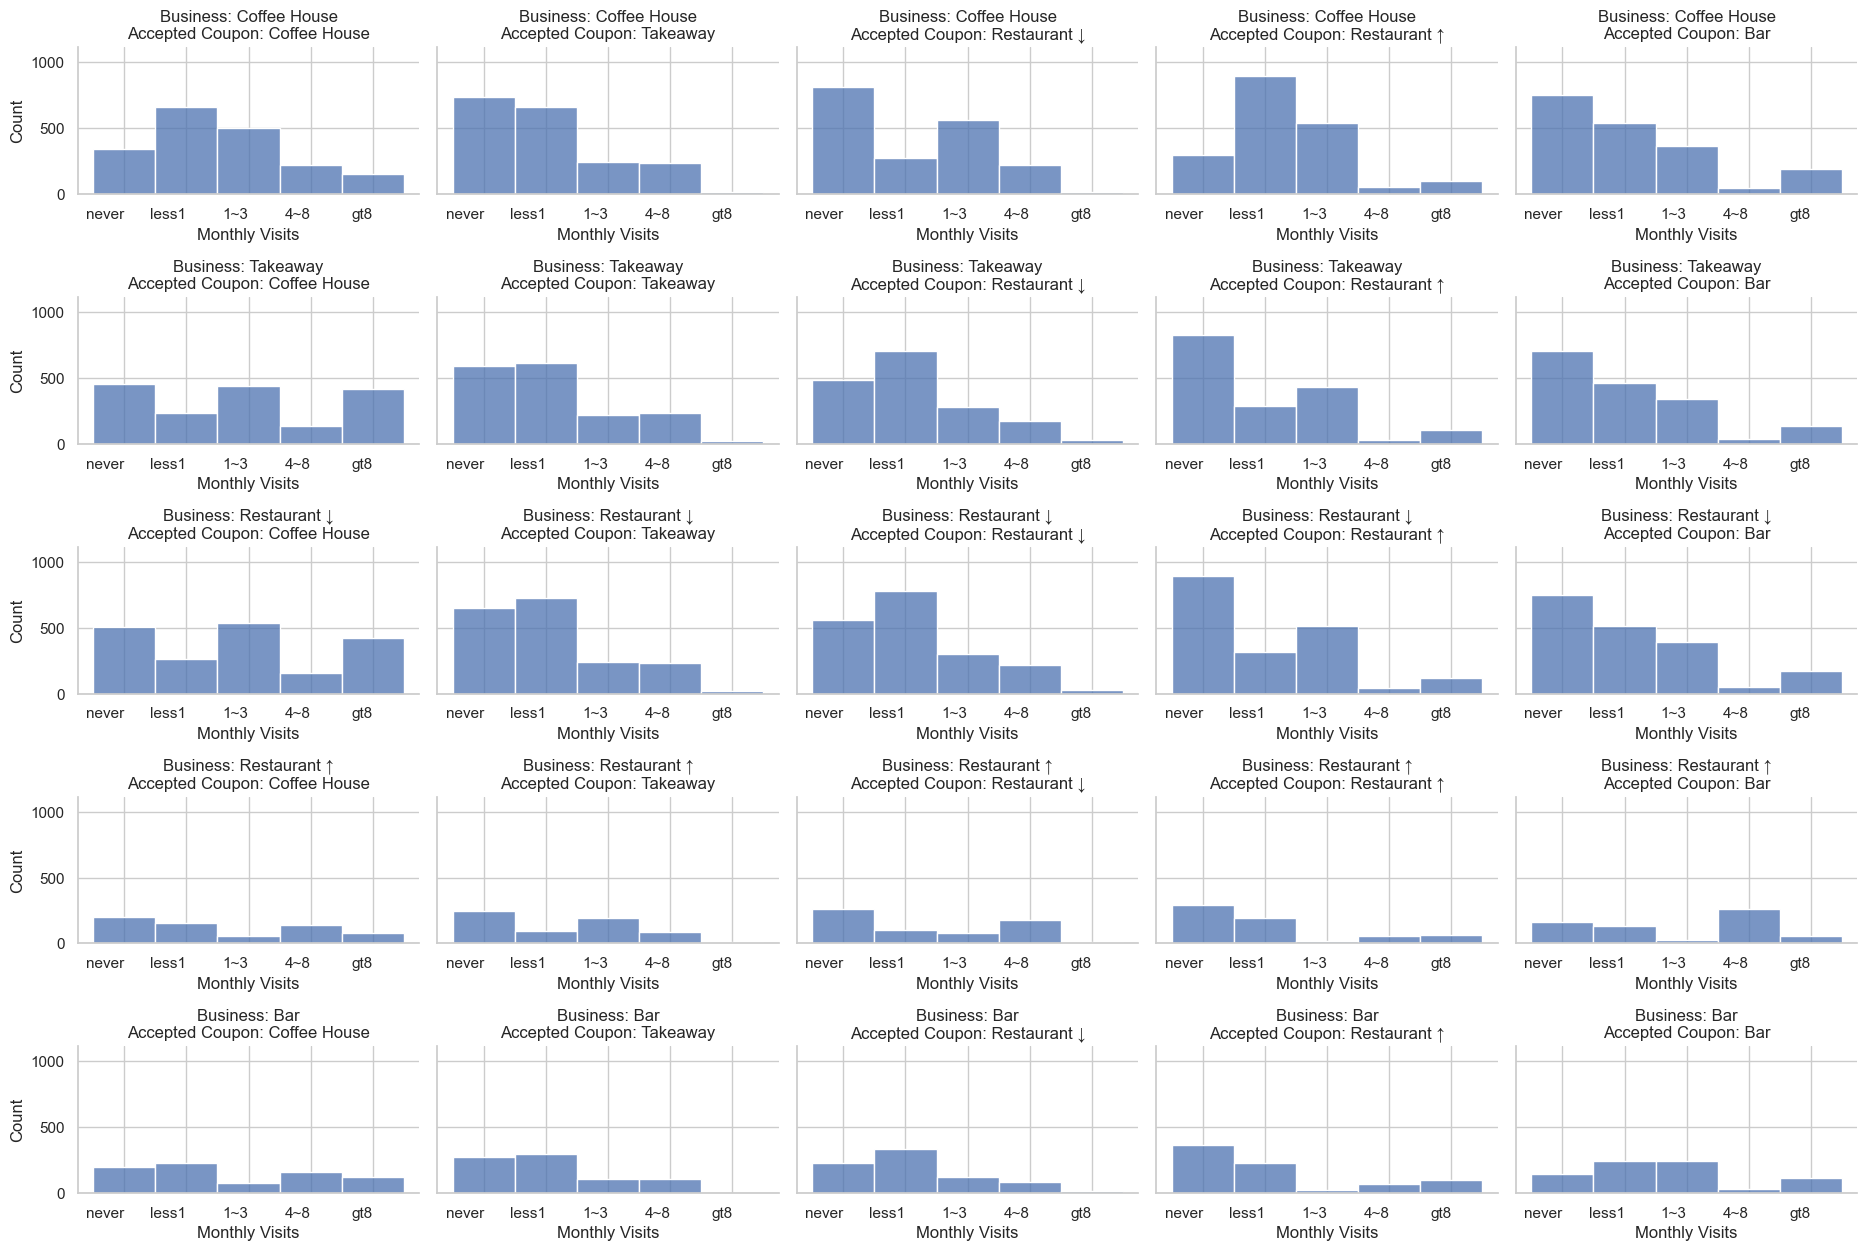

In [49]:
df_business = df[['Y', 'coupon', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50', 'Bar', 'CoffeeHouse']]
variables = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
categories = ['never', 'less1', '1~3', '4~8', 'gt8']

for column in variables:
    df_business.loc[:, column] = pd.Categorical(df_business.loc[:, column], categories=categories, ordered=True)

label_mapping = {
    'Restaurant(<20)': 'Restaurant ↓',
    'Restaurant(20-50)': 'Restaurant ↑',
    'Bar': 'Bar',
    'Carry out & Take away': 'Takeaway',
    'Coffee House': 'Coffee House'
}

column_mapping = {
    'RestaurantLessThan20': 'Restaurant ↓',
    'Restaurant20To50': 'Restaurant ↑',
    'Bar': 'Bar',
    'CarryAway': 'Takeaway',
    'CoffeeHouse': 'Coffee House'
}

df_business.loc[:, 'coupon'] = df_business['coupon'].replace(label_mapping)

accepted_df = df_business[df_business['Y'] == 1].copy()

accepted_df.rename(columns=column_mapping, inplace=True)

updated_variables = ['Coffee House', 'Takeaway', 'Restaurant ↓', 'Restaurant ↑', 'Bar']

variables_renamed = list(column_mapping.values())
df_business = accepted_df[variables_renamed + ['coupon']]

g = sns.FacetGrid(pd.melt(df_business, id_vars=['coupon']), col="variable", row="coupon", 
                  col_order=updated_variables, row_order=updated_variables, sharex=False, sharey=True, aspect=1.5, height=2.5)
g.map(sns.histplot, "value", binwidth=1, discrete=True)

for ax in g.axes.flat:
    ax.set_xticks(range(len(categories)))
    ax.set_xticklabels(categories, ha='right')
    ax.set_xlabel('Monthly Visits')
    
    title_parts = ax.get_title().split('|')
    business = title_parts[0].strip().replace("coupon = ", "")
    variable = title_parts[1].strip().replace("variable = ", "")
    
    ax.set_title(f'Business: {business}\nAccepted Coupon: {variable}')

    # for p in ax.patches:
    #     height = p.get_height()
    #     total = sum([p.get_height() for p in ax.patches])
    #     percentage = f'{height / total * 100:.1f}%'
    #     ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height),
    #                 ha='center', va='center', xytext=(0, 15), textcoords='offset points')
    ax.set_ylim(0, ax.get_ylim()[1] + 7)

# Adjust spacing to avoid overlap
plt.subplots_adjust(hspace=0.7)

plt.show()

We can see from these graphs the frequency of vists to the different businesses given they've accepted a certain coupon. We can see that those who accept coupons tend to go to coffee houses, takeaway restaurants and inexpensive restaurants.

**Is there a correlation between the frequency of visits to different types of businesses?**

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ15min',
       'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'Y',
       'age_numeric'],
      dtype='object')


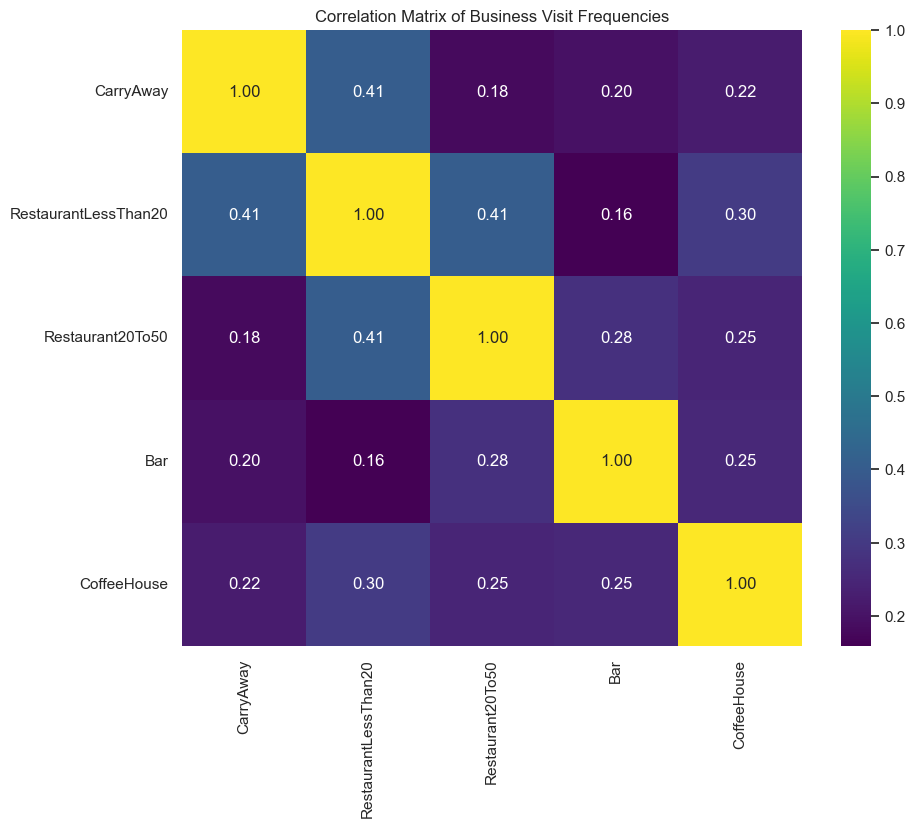

In [52]:
df_filtered = df.copy()

frequency_mapping = {
    'never': 0,
    'less1': 1,
    '1~3': 2,
    '4~8': 3,
    'gt8': 4
}

df_filtered.loc[:, 'CarryAway'] = df_filtered['CarryAway'].map(frequency_mapping)
df_filtered.loc[:, 'RestaurantLessThan20'] = df_filtered['RestaurantLessThan20'].map(frequency_mapping)
df_filtered.loc[:, 'Restaurant20To50'] = df_filtered['Restaurant20To50'].map(frequency_mapping)
df_filtered.loc[:, 'Bar'] = df_filtered['Bar'].map(frequency_mapping)
df_filtered.loc[:, 'CoffeeHouse'] = df_filtered['CoffeeHouse'].map(frequency_mapping)
print(df_filtered.columns)
correlation_matrix = df_filtered[['CarryAway', 'RestaurantLessThan20', 'Restaurant20To50', 'Bar', 'CoffeeHouse']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Matrix of Business Visit Frequencies')
plt.show()


In [53]:
correlation_pairs = correlation_matrix.unstack().reset_index()
correlation_pairs.columns = ['Variable1', 'Variable2', 'Correlation']

correlation_pairs = correlation_pairs[correlation_pairs['Variable1'] != correlation_pairs['Variable2']]
correlation_pairs = correlation_pairs.drop_duplicates(subset=['Correlation'], keep='first')

correlation_pairs = pd.DataFrame(correlation_pairs.reindex(correlation_pairs['Correlation'].abs().sort_values(ascending=False).index)).reset_index(drop=True)

print(correlation_pairs)

              Variable1             Variable2  Correlation
0  RestaurantLessThan20      Restaurant20To50     0.405207
1             CarryAway  RestaurantLessThan20     0.405206
2  RestaurantLessThan20           CoffeeHouse     0.304643
3      Restaurant20To50                   Bar     0.276557
4                   Bar           CoffeeHouse     0.252088
5      Restaurant20To50           CoffeeHouse     0.246870
6             CarryAway           CoffeeHouse     0.224194
7             CarryAway                   Bar     0.197706
8             CarryAway      Restaurant20To50     0.178708
9  RestaurantLessThan20                   Bar     0.158937


By calculating the correlation between the frequency of visits to different types of businesses, we find that people who frequent inexpensive restaurants alse frequent expensive restaurants, and people who frequent takeout restaurants also frequent inexpensive restaurants. 

**Findings**

We analyzed the relationship between income, business visity frequency and coupon acceptance rate for restaurant businesses. We found that inexpensive restaurant and take-out coupons were accepted at similar rates, and more often than expensive restaurants. It also seems that the income bracket and the frequency of attendance to other restaurants does not affect the overall average acceptance rate. 

We also visualized the frequency of attendance and the acceptance rate of the coupon, and we found that coupons were accepted at approximally the same rate independently of how often they visited the business. 

When plotting the attendance of each business for the participants who accepted a certain type of coupon, we find that the majority of those accepting coupons attend coffee houses, takeaway restaurants and  inexpensive restaurants. 

By calculating the correlation between the frequency of visits to different types of businesses, we find that people who frequent inexpensive restaurants alse frequent expensive restaurants, and people who frequent takeout restaurants also frequent inexpensive restaurants.